# Bicycles and Pedestrians Safety in NC
 
XXX



In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
bicycles_data = "bicycle-crash-data-chapel-hill-region.csv"

# Read the bike data 
bicycles_df = pd.read_csv(bicycles_data, sep=";", encoding = 'utf8', error_bad_lines=False)
bicycles_df.head()

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,"35.4806042896,-77.5889481701",No,12,11-15,No,No,With Traffic,O: No Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Rural,30 - 35 MPH,Stop Sign,Clear,No
1,"35.9467925798,-77.7986838098",No,25,25-29,No,No,Unknown,O: No Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop Sign,Clear,No
2,"35.70864746,-78.6193414402",Yes,36,30-39,No,No,With Traffic,C: Possible Injury,Bike Lane / Paved Shoulder,White,...,Dry,"Two-Way, Divided, Unprotected Median",None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No
3,"35.7327359204,-78.78055321",Yes,63,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Divided, Unprotected Median",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,Stop Sign,Clear,No
4,"35.2090071697,-80.8227561396",No,14,11-15,No,No,With Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No


In [3]:
pedestrian_data = "pedestrian-crashes-chapel-hill-region.csv"
pedestrian_df = pd.read_csv(pedestrian_data, sep=";", encoding = 'utf8', error_bad_lines=False)
pedestrian_df.head()


,geo_point_2d,Ambulance,City,County,Alcohol Present,Day of Week,CrashGrp,CrashHour,CrashLoc,CrashMonth,...,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,"35.5030005611,-83.0770548701",Yes,None - Rural Crash,Haywood,No,Wednesday,Unusual Circumstances,22,Non-Roadway,October,...,"One-Way, Not Divided",None,"Driveway, Private",Gravel,Mountains,Rural,Unknown,No Control Present,Clear,No
1,"35.4425378359,-80.6259865203",Yes,Kannapolis,Cabarrus,No,Tuesday,Walking Along Roadway,22,Non-Intersection,September,...,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No
2,"35.5295336958,-77.3269159495",Yes,None - Rural Crash,Pitt,No,Thursday,Off Roadway,8,Non-Roadway,October,...,"Two-Way, Not Divided",None,"Driveway, Public",Smooth Asphalt,Coastal,Rural,5 - 15 MPH,No Control Present,Clear,No
3,"35.7076545264,-81.3069425905",Yes,Hickory,Catawba,Yes,Thursday,Off Roadway,19,Non-Roadway,September,...,"Two-Way, Not Divided",None,"Driveway, Public",Smooth Asphalt,Piedmont,Urban,Unknown,No Control Present,Clear,No
4,"34.9761327288,-80.5415259295",No,Monroe,Union,No,Thursday,Off Roadway,13,Non-Roadway,September,...,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,Unknown,No Control Present,Clear,No


In [4]:
len(bicycles_df)

11266

In [5]:
len(pedestrian_df)

33707

In [6]:
bike_cols = bicycles_df.keys()
bike_cols

Index(['geo_point_2d', 'Ambulance', 'BikeAge', 'BikeAgeGrp', 'BikeAlcDrg',
       'BikeAlcFlg', 'BikeDir', 'BikeInjury', 'BikePos', 'BikeRace', 'BikeSex',
       'City', 'County', 'Biker Intox.', 'Day of Week', 'CrashGrp',
       'CrashHour', 'CrashLoc', 'CrashMonth', 'CrashSevr', 'CrashType',
       'CrashYear', 'Development', 'DrvrAge', 'DrvrAgeGrp', 'DrvrAlcDrg',
       'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace', 'DrvrSex', 'DrvrVehTyp',
       'HitRun', 'LightCond', 'Locality', 'NumBicsAin', 'NumBicsBin',
       'NumBicsCin', 'NumBicsKil', 'NumBicsNoi', 'NumBicsTot', 'NumBicsUin',
       'NumLanes', 'NumUnits', 'RdCharacte', 'RdClass', 'RdConditio',
       'RdConfig', 'RdDefects', 'RdFeature', 'RdSurface', 'RuralUrban',
       'SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone'],
      dtype='object')

In [7]:
pedestrian_cols = pedestrian_df.keys()
pedestrian_cols


Index(['geo_point_2d', 'Ambulance', 'City', 'County', 'Alcohol Present',
       'Day of Week', 'CrashGrp', 'CrashHour', 'CrashLoc', 'CrashMonth',
       'CrashSevr', 'CrashType', 'CrashYear', 'Development', 'DrvrAge',
       'DrvrAgeGrp', 'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace',
       'DrvrSex', 'DrvrVehTyp', 'HitRun', 'Latitude', 'LightCond', 'Locality',
       'Longitude', 'NumLanes', 'NumPedsAin', 'NumPedsBin', 'NumPedsCin',
       'NumPedsKil', 'NumPedsNoi', 'NumPedsTot', 'NumPedsUin', 'NumUnits',
       'PedAge', 'PedAgeGrp', 'PedAlcDrg', 'Ped Intox.', 'PedInjury', 'PedPos',
       'PedRace', 'PedSex', 'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig',
       'RdDefects', 'RdFeature', 'RdSurface', 'Region', 'RuralUrban',
       'SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone'],
      dtype='object')

In [8]:
print(len(bike_cols), len(pedestrian_cols))


55 57


In [9]:
bicycles_df["CrashSevr"].value_counts()

B: Suspected Minor Injury      4696
C: Possible Injury             4369
O: No Injury                   1283
A: Suspected Serious Injury     589
K: Killed                       259
Unknown Injury                   70
Name: CrashSevr, dtype: int64

In [10]:
bicycles_df['RdClass'].value_counts()


Local Street              6767
State Secondary Route     1742
NC Route                   928
US Route                   826
Public Vehicular Area      810
Private Road, Driveway      82
missing                     53
Interstate                  29
Unknown                     26
.                            3
Name: RdClass, dtype: int64

In [11]:
bicycles_df['RdSurface'].value_counts()


Smooth Asphalt      7152
Coarse Asphalt      3664
Concrete             273
Grooved Concrete      64
Missing               42
Gravel                26
Other                 17
Unknown               15
Soil                   7
Sand                   6
Name: RdSurface, dtype: int64

In [12]:
bicycles_df['RdConfig'].value_counts()


Two-Way, Not Divided                         8452
Two-Way, Divided, Unprotected Median         1798
One-Way, Not Divided                          446
Two-Way, Divided, Positive Median Barrier     436
Unknown                                       134
Name: RdConfig, dtype: int64

In [13]:
bicycles_df['Weather'].value_counts()


Clear                                       9286
Cloudy                                      1438
Rain                                         484
Fog, Smog, Smoke                              24
Other                                         19
Snow, Sleet, Hail, Freezing Rain/Drizzle      15
Name: Weather, dtype: int64

In [14]:
bicycles_df['SpeedLimit'].value_counts()


30 - 35  MPH    4488
40 - 45  MPH    2408
20 - 25  MPH    1867
50 - 55  MPH    1278
5 - 15 MPH       634
Unknown          562
60 - 75 MPH       29
Name: SpeedLimit, dtype: int64

In [15]:
bicycles_df['TraffCntrl'].value_counts()


No Control Present                     5152
Stop Sign                              2341
Stop And Go Signal                     2041
Double Yellow Line, No Passing Zone    1372
Missing                                 153
Yield Sign                               66
Other                                    50
Flashing Stop And Go Signal              34
Flashing Signal With Stop Sign           23
Human Control                            13
Flashing Signal Without Stop Sign         9
RR Gate And Flasher                       4
Warning Sign                              4
School Zone Signs                         4
Name: TraffCntrl, dtype: int64

In [16]:
bicycles_df["SpeedLimit_upper_value"]=""
bicycles_df['Age']=""


In [17]:
age_values_str = bicycles_df['BikeAge'].str.split("+")


In [18]:
for i in range(len(bicycles_df)):
    
# assign numerical values for age    
    bicycles_df.loc[i, "Age"] = int(age_values_str[i][0])
    if int(age_values_str[i][0]) > 100:
        bicycles_df.loc[i, "Age"] = 0 
        
# assign values upper speed limit
    if bicycles_df['SpeedLimit'][i]=="30 - 35  MPH":
        bicycles_df.loc[i, "SpeedLimit_upper_value"] = 35
        
    elif bicycles_df['SpeedLimit'][i]=="40 - 45  MPH":
        bicycles_df.loc[i, "SpeedLimit_upper_value"] = 45
    
    elif bicycles_df['SpeedLimit'][i]=="20 - 25  MPH":
        bicycles_df.loc[i, "SpeedLimit_upper_value"] = 25
        
    elif bicycles_df['SpeedLimit'][i]=="50 - 55  MPH":
        bicycles_df.loc[i, "SpeedLimit_upper_value"] = 55
        
    elif bicycles_df['SpeedLimit'][i]=="5 - 15 MPH":
        bicycles_df.loc[i, "SpeedLimit_upper_value"] = 15
        
    elif bicycles_df['SpeedLimit'][i]=="60 - 75 MPH":
        bicycles_df.loc[i, "SpeedLimit_upper_value"] = 75
        
    else:
        bicycles_df.loc[i, "SpeedLimit_upper_value"] = 0
    
    if i%1000==0:
        print(i)

print("completed values population for bycilces_crash data")


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
completed values population for bycilces_crash data


In [19]:
bicycles_df.head()


,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
0,"35.4806042896,-77.5889481701",No,12,11-15,No,No,With Traffic,O: No Injury,Travel Lane,Black,...,None,Four-Way Intersection,Smooth Asphalt,Rural,30 - 35 MPH,Stop Sign,Clear,No,35,12
1,"35.9467925798,-77.7986838098",No,25,25-29,No,No,Unknown,O: No Injury,Travel Lane,Black,...,None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop Sign,Clear,No,35,25
2,"35.70864746,-78.6193414402",Yes,36,30-39,No,No,With Traffic,C: Possible Injury,Bike Lane / Paved Shoulder,White,...,None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,45,36
3,"35.7327359204,-78.78055321",Yes,63,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,Stop Sign,Clear,No,35,63
4,"35.2090071697,-80.8227561396",No,14,11-15,No,No,With Traffic,C: Possible Injury,Travel Lane,Black,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No,35,14


In [20]:
# Index(['geo_point_2d', 'Ambulance', 'BikeAge', 'BikeAgeGrp', 'BikeAlcDrg',
#        'BikeAlcFlg', 'BikeDir', 'BikeInjury', 'BikePos', 'BikeRace', 'BikeSex',
#        'City', 'County', 'Biker Intox.', 'Day of Week', 'CrashGrp',
#        'CrashHour', 'CrashLoc', 'CrashMonth', 'CrashSevr', 'CrashType',
#        'CrashYear', 'Development', 'DrvrAge', 'DrvrAgeGrp', 'DrvrAlcDrg',
#        'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace', 'DrvrSex', 'DrvrVehTyp',
#        'HitRun', 'LightCond', 'Locality', 'NumBicsAin', 'NumBicsBin',
#        'NumBicsCin', 'NumBicsKil', 'NumBicsNoi', 'NumBicsTot', 'NumBicsUin',
#        'NumLanes', 'NumUnits', 'RdCharacte', 'RdClass', 'RdConditio',
#        'RdConfig', 'RdDefects', 'RdFeature', 'RdSurface', 'RuralUrban',
#        'SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone'],
#       dtype='object')

In [21]:
bicycles_df_selcols = bicycles_df[['geo_point_2d', 'Ambulance', 'BikeAge', 'BikeAgeGrp', 'BikeAlcDrg', 'BikeInjury', 'BikeRace', 'BikeSex',
       'City', 'County','Day of Week', 'CrashGrp',
       'CrashHour', 'CrashLoc', 'CrashMonth', 'CrashSevr', 'CrashType',
       'CrashYear', 'DrvrAge', 'DrvrAgeGrp', 'DrvrAlcDrg',
       'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace', 'DrvrSex', 'DrvrVehTyp',
       'HitRun', 'LightCond', 'Locality', 'SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone', 'SpeedLimit_upper_value', 'Age']]
bicycles_df_selcols.head()

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeInjury,BikeRace,BikeSex,City,County,...,DrvrVehTyp,HitRun,LightCond,Locality,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
0,"35.4806042896,-77.5889481701",No,12,11-15,No,O: No Injury,Black,Male,None - Rural Crash,Greene,...,Passenger Car,No,Daylight,Mixed (30% To 70% Developed),30 - 35 MPH,Stop Sign,Clear,No,35,12
1,"35.9467925798,-77.7986838098",No,25,25-29,No,O: No Injury,Black,Female,Rocky Mount,Nash,...,Pickup,No,Daylight,Urban (>70% Developed),30 - 35 MPH,Stop Sign,Clear,No,35,25
2,"35.70864746,-78.6193414402",Yes,36,30-39,No,C: Possible Injury,White,Male,Garner,Wake,...,Passenger Car,No,Daylight,Urban (>70% Developed),40 - 45 MPH,No Control Present,Clear,No,45,36
3,"35.7327359204,-78.78055321",Yes,63,60-69,No,C: Possible Injury,White,Male,Cary,Wake,...,Sport Utility,No,Daylight,Urban (>70% Developed),30 - 35 MPH,Stop Sign,Clear,No,35,63
4,"35.2090071697,-80.8227561396",No,14,11-15,No,C: Possible Injury,Black,Male,Charlotte,Mecklenburg,...,Passenger Car,No,Daylight,Urban (>70% Developed),30 - 35 MPH,No Control Present,Cloudy,No,35,14


In [22]:
geo_points = bicycles_df_selcols["geo_point_2d"].str.split(",", n = 1, expand = True) 
geo_points = geo_points.rename(columns={0:"Lat", 1:"Lng"})
geo_points

,Lat,Lng
0,35.4806042896,-77.5889481701
1,35.9467925798,-77.7986838098
2,35.70864746,-78.6193414402
3,35.7327359204,-78.78055321
4,35.2090071697,-80.8227561396
...,...,...
11261,34.6601914196,-78.9999931397
11262,36.14581221,-79.6523254797
11263,36.0657177002,-79.8319427298
11264,35.09008672,-80.8857645404


In [24]:
bicycles_df_selcols.loc[:, 'Lat'] = geo_points[["Lat"]]
bicycles_df_selcols.loc[:, 'Lng'] = geo_points[["Lng"]]
bicycles_df_selcols.head()

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeInjury,BikeRace,BikeSex,City,County,...,LightCond,Locality,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age,Lat,Lng
0,"35.4806042896,-77.5889481701",No,12,11-15,No,O: No Injury,Black,Male,None - Rural Crash,Greene,...,Daylight,Mixed (30% To 70% Developed),30 - 35 MPH,Stop Sign,Clear,No,35,12,35.4806042896,-77.5889481701
1,"35.9467925798,-77.7986838098",No,25,25-29,No,O: No Injury,Black,Female,Rocky Mount,Nash,...,Daylight,Urban (>70% Developed),30 - 35 MPH,Stop Sign,Clear,No,35,25,35.9467925798,-77.7986838098
2,"35.70864746,-78.6193414402",Yes,36,30-39,No,C: Possible Injury,White,Male,Garner,Wake,...,Daylight,Urban (>70% Developed),40 - 45 MPH,No Control Present,Clear,No,45,36,35.70864746,-78.6193414402
3,"35.7327359204,-78.78055321",Yes,63,60-69,No,C: Possible Injury,White,Male,Cary,Wake,...,Daylight,Urban (>70% Developed),30 - 35 MPH,Stop Sign,Clear,No,35,63,35.7327359204,-78.78055321
4,"35.2090071697,-80.8227561396",No,14,11-15,No,C: Possible Injury,Black,Male,Charlotte,Mecklenburg,...,Daylight,Urban (>70% Developed),30 - 35 MPH,No Control Present,Cloudy,No,35,14,35.2090071697,-80.8227561396


In [25]:
bicycles_df_selcols.to_csv("data/bicycles_selcols_v1.csv")

In [26]:
# Index(['geo_point_2d', 'Ambulance', 'City', 'County', 'Alcohol Present',
#        'Day of Week', 'CrashGrp', 'CrashHour', 'CrashLoc', 'CrashMonth',
#        'CrashSevr', 'CrashType', 'CrashYear', 'Development', 'DrvrAge',
#        'DrvrAgeGrp', 'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace',
#        'DrvrSex', 'DrvrVehTyp', 'HitRun', 'Latitude', 'LightCond', 'Locality',
#        'Longitude', 'NumLanes', 'NumPedsAin', 'NumPedsBin', 'NumPedsCin',
#        'NumPedsKil', 'NumPedsNoi', 'NumPedsTot', 'NumPedsUin', 'NumUnits',
#        'PedAge', 'PedAgeGrp', 'PedAlcDrg', 'Ped Intox.', 'PedInjury', 'PedPos',
#        'PedRace', 'PedSex', 'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig',
#        'RdDefects', 'RdFeature', 'RdSurface', 'Region', 'RuralUrban',
#        'SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone'],
#       dtype='object')

In [27]:
pedestrian_df['SpeedLimit'].value_counts()


30 - 35  MPH    10544
40 - 45  MPH     5579
5 - 15 MPH       5544
20 - 25  MPH     4611
Unknown          3657
50 - 55  MPH     3137
60 - 75 MPH       635
Name: SpeedLimit, dtype: int64

In [28]:
pedestrian_df['CrashSevr'].value_counts()


C: Possible Injury             13802
B: Suspected Minor Injury      12100
O: No Injury                    2781
A: Suspected Serious Injury     2474
K: Killed                       2188
Unknown Injury                   362
Name: CrashSevr, dtype: int64

In [29]:
pedestrian_df["SpeedLimit_upper_value"]=""
pedestrian_df['Age']=""


In [30]:
pedage_values_str = pedestrian_df['PedAge'].str.split("+")


In [31]:
for i in range(len(pedestrian_df)):
# assign numerical values for age   

    pedestrian_df.loc[i, "Age"] = int(pedage_values_str[i][0])
    if int(pedage_values_str[i][0]) > 100:
        pedestrian_df.loc[i, "Age"] = 0 
        
# assign values upper speed limit
    if pedestrian_df['SpeedLimit'][i]=="30 - 35  MPH":
        pedestrian_df.loc[i, "SpeedLimit_upper_value"] = 35
        
    elif pedestrian_df['SpeedLimit'][i]=="40 - 45  MPH":
        pedestrian_df.loc[i, "SpeedLimit_upper_value"] = 45
    
    elif pedestrian_df['SpeedLimit'][i]=="20 - 25  MPH":
        pedestrian_df.loc[i, "SpeedLimit_upper_value"] = 25
        
    elif pedestrian_df['SpeedLimit'][i]=="50 - 55  MPH":
        pedestrian_df.loc[i, "SpeedLimit_upper_value"] = 55
        
    elif pedestrian_df['SpeedLimit'][i]=="5 - 15 MPH":
        pedestrian_df.loc[i, "SpeedLimit_upper_value"] = 15
        
    elif pedestrian_df['SpeedLimit'][i]=="60 - 75 MPH":
        pedestrian_df.loc[i, "SpeedLimit_upper_value"] = 75
        
    else:
        pedestrian_df.loc[i, "SpeedLimit_upper_value"] = 0
    
    if i%1000==0:
        print(i)

print("completed values population for pedestrian_crash data")


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
completed values population for pedestrian_crash data


In [32]:
pedestrian_df.head()


,geo_point_2d,Ambulance,City,County,Alcohol Present,Day of Week,CrashGrp,CrashHour,CrashLoc,CrashMonth,...,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
0,"35.5030005611,-83.0770548701",Yes,None - Rural Crash,Haywood,No,Wednesday,Unusual Circumstances,22,Non-Roadway,October,...,"Driveway, Private",Gravel,Mountains,Rural,Unknown,No Control Present,Clear,No,0,36
1,"35.4425378359,-80.6259865203",Yes,Kannapolis,Cabarrus,No,Tuesday,Walking Along Roadway,22,Non-Intersection,September,...,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,35,17
2,"35.5295336958,-77.3269159495",Yes,None - Rural Crash,Pitt,No,Thursday,Off Roadway,8,Non-Roadway,October,...,"Driveway, Public",Smooth Asphalt,Coastal,Rural,5 - 15 MPH,No Control Present,Clear,No,15,17
3,"35.7076545264,-81.3069425905",Yes,Hickory,Catawba,Yes,Thursday,Off Roadway,19,Non-Roadway,September,...,"Driveway, Public",Smooth Asphalt,Piedmont,Urban,Unknown,No Control Present,Clear,No,0,59
4,"34.9761327288,-80.5415259295",No,Monroe,Union,No,Thursday,Off Roadway,13,Non-Roadway,September,...,No Special Feature,Smooth Asphalt,Piedmont,Urban,Unknown,No Control Present,Clear,No,0,5


In [42]:
pedestrian_df_selcols = pedestrian_df[['geo_point_2d', 'Ambulance', 'City', 'County', 'Alcohol Present',
       'Day of Week', 'CrashGrp', 'CrashHour', 'CrashLoc', 'CrashMonth',
       'CrashSevr', 'CrashType', 'CrashYear', 'DrvrAge',
       'DrvrAgeGrp', 'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace',
       'DrvrSex', 'DrvrVehTyp', 'HitRun', 'Latitude', 'LightCond', 'Locality',
       'Longitude', 
       'PedAge', 'PedAgeGrp', 'PedAlcDrg', 'Ped Intox.', 'PedInjury', 'PedPos',
       'PedRace', 'PedSex', 
       'RdDefects', 'RdFeature', 'RdSurface', 'Region', 'RuralUrban',
       'SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone', 'SpeedLimit_upper_value', 'Age']]
pedestrian_df_selcols.head()

,geo_point_2d,Ambulance,City,County,Alcohol Present,Day of Week,CrashGrp,CrashHour,CrashLoc,CrashMonth,...,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
0,"35.5030005611,-83.0770548701",Yes,None - Rural Crash,Haywood,No,Wednesday,Unusual Circumstances,22,Non-Roadway,October,...,"Driveway, Private",Gravel,Mountains,Rural,Unknown,No Control Present,Clear,No,0,36
1,"35.4425378359,-80.6259865203",Yes,Kannapolis,Cabarrus,No,Tuesday,Walking Along Roadway,22,Non-Intersection,September,...,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,35,17
2,"35.5295336958,-77.3269159495",Yes,None - Rural Crash,Pitt,No,Thursday,Off Roadway,8,Non-Roadway,October,...,"Driveway, Public",Smooth Asphalt,Coastal,Rural,5 - 15 MPH,No Control Present,Clear,No,15,17
3,"35.7076545264,-81.3069425905",Yes,Hickory,Catawba,Yes,Thursday,Off Roadway,19,Non-Roadway,September,...,"Driveway, Public",Smooth Asphalt,Piedmont,Urban,Unknown,No Control Present,Clear,No,0,59
4,"34.9761327288,-80.5415259295",No,Monroe,Union,No,Thursday,Off Roadway,13,Non-Roadway,September,...,No Special Feature,Smooth Asphalt,Piedmont,Urban,Unknown,No Control Present,Clear,No,0,5


In [43]:
pedestrian_df_selcols = pedestrian_df_selcols.rename(columns={'Ped Intox.':'PedIntox'})

In [44]:
geo_points = pedestrian_df_selcols["geo_point_2d"].str.split(",", n = 1, expand = True) 
geo_points = geo_points.rename(columns={0:"Lat", 1:"Lng"})
geo_points

,Lat,Lng
0,35.5030005611,-83.0770548701
1,35.4425378359,-80.6259865203
2,35.5295336958,-77.3269159495
3,35.7076545264,-81.3069425905
4,34.9761327288,-80.5415259295
...,...,...
33702,35.5735569469,-76.9973257395
33703,35.6008158317,-82.5467531594
33704,35.1670019186,-78.7081027697
33705,34.2426660958,-77.9094063297


In [45]:
pedestrian_df_selcols.loc[:, 'Lat'] = geo_points[["Lat"]]
pedestrian_df_selcols.loc[:, 'Lng'] = geo_points[["Lng"]]
pedestrian_df_selcols.head()

,geo_point_2d,Ambulance,City,County,Alcohol Present,Day of Week,CrashGrp,CrashHour,CrashLoc,CrashMonth,...,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age,Lat,Lng
0,"35.5030005611,-83.0770548701",Yes,None - Rural Crash,Haywood,No,Wednesday,Unusual Circumstances,22,Non-Roadway,October,...,Mountains,Rural,Unknown,No Control Present,Clear,No,0,36,35.5030005611,-83.0770548701
1,"35.4425378359,-80.6259865203",Yes,Kannapolis,Cabarrus,No,Tuesday,Walking Along Roadway,22,Non-Intersection,September,...,Piedmont,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,35,17,35.4425378359,-80.6259865203
2,"35.5295336958,-77.3269159495",Yes,None - Rural Crash,Pitt,No,Thursday,Off Roadway,8,Non-Roadway,October,...,Coastal,Rural,5 - 15 MPH,No Control Present,Clear,No,15,17,35.5295336958,-77.3269159495
3,"35.7076545264,-81.3069425905",Yes,Hickory,Catawba,Yes,Thursday,Off Roadway,19,Non-Roadway,September,...,Piedmont,Urban,Unknown,No Control Present,Clear,No,0,59,35.7076545264,-81.3069425905
4,"34.9761327288,-80.5415259295",No,Monroe,Union,No,Thursday,Off Roadway,13,Non-Roadway,September,...,Piedmont,Urban,Unknown,No Control Present,Clear,No,0,5,34.9761327288,-80.5415259295


In [46]:
pedestrian_df_selcols.to_csv("data/pedestrian_selcols_v1.csv")

In [47]:
grouped_severity_bikes = bicycles_df_selcols.groupby(['CrashSevr'])
grouped_severity_bikes.head(20)


,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeInjury,BikeRace,BikeSex,City,County,...,LightCond,Locality,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age,Lat,Lng
0,"35.4806042896,-77.5889481701",No,12,11-15,No,O: No Injury,Black,Male,None - Rural Crash,Greene,...,Daylight,Mixed (30% To 70% Developed),30 - 35 MPH,Stop Sign,Clear,No,35,12,35.4806042896,-77.5889481701
1,"35.9467925798,-77.7986838098",No,25,25-29,No,O: No Injury,Black,Female,Rocky Mount,Nash,...,Daylight,Urban (>70% Developed),30 - 35 MPH,Stop Sign,Clear,No,35,25,35.9467925798,-77.7986838098
2,"35.70864746,-78.6193414402",Yes,36,30-39,No,C: Possible Injury,White,Male,Garner,Wake,...,Daylight,Urban (>70% Developed),40 - 45 MPH,No Control Present,Clear,No,45,36,35.70864746,-78.6193414402
3,"35.7327359204,-78.78055321",Yes,63,60-69,No,C: Possible Injury,White,Male,Cary,Wake,...,Daylight,Urban (>70% Developed),30 - 35 MPH,Stop Sign,Clear,No,35,63,35.7327359204,-78.78055321
4,"35.2090071697,-80.8227561396",No,14,11-15,No,C: Possible Injury,Black,Male,Charlotte,Mecklenburg,...,Daylight,Urban (>70% Developed),30 - 35 MPH,No Control Present,Cloudy,No,35,14,35.2090071697,-80.8227561396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,"34.2252190204,-77.8662179204",No,19,16-19,No,Unknown Injury,White,Male,Wilmington,New Hanover,...,Daylight,Urban (>70% Developed),Unknown,No Control Present,Cloudy,No,0,19,34.2252190204,-77.8662179204
3551,"35.73393938,-79.4357616701",No,48,40-49,No,Unknown Injury,Unknown/Missing,Male,Siler City,Chatham,...,Dark - Lighted Roadway,Mixed (30% To 70% Developed),40 - 45 MPH,Stop And Go Signal,Clear,No,45,48,35.73393938,-79.4357616701
3640,"35.8827549998,-78.5603900002",No,999,Unknown,.,Unknown Injury,Unknown/Missing,Unknown,Raleigh,Wake,...,Dusk,Urban (>70% Developed),5 - 15 MPH,No Control Present,Clear,No,15,0,35.8827549998,-78.5603900002
3705,"35.2203298608,-80.8352231197",No,29,25-29,Missing,Unknown Injury,Black,Male,Charlotte,Mecklenburg,...,Dark - Lighted Roadway,Urban (>70% Developed),30 - 35 MPH,Stop And Go Signal,Clear,No,35,29,35.2203298608,-80.8352231197


In [48]:
med_age_severity_bikes = grouped_severity_bikes['Age'].median()
med_age_severity_bikes

CrashSevr
A: Suspected Serious Injury    35.0
B: Suspected Minor Injury      29.0
C: Possible Injury             28.0
K: Killed                      46.0
O: No Injury                   23.0
Unknown Injury                 24.5
Name: Age, dtype: float64

In [49]:
med_sl_severity_bikes = grouped_severity_bikes['SpeedLimit_upper_value'].median()
med_sl_severity_bikes


CrashSevr
A: Suspected Serious Injury    45
B: Suspected Minor Injury      35
C: Possible Injury             35
K: Killed                      45
O: No Injury                   35
Unknown Injury                 35
Name: SpeedLimit_upper_value, dtype: int64

In [50]:
count_severity_bikes = grouped_severity_bikes['CrashSevr'].count()
count_severity_bikes


CrashSevr
A: Suspected Serious Injury     589
B: Suspected Minor Injury      4696
C: Possible Injury             4369
K: Killed                       259
O: No Injury                   1283
Unknown Injury                   70
Name: CrashSevr, dtype: int64

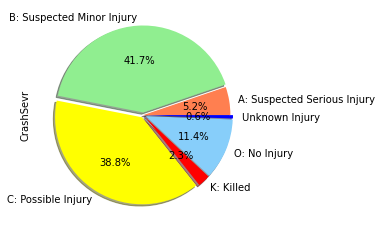

In [51]:
colors = ["coral", "lightgreen", "yellow", "red", "lightskyblue", "blue"]
explode = (0, 0.03, 0.03, 0.03, 0.03, 0.03)
count_severity_bikes.plot(kind='pie', colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)


In [59]:
count_sevr_bikes = pd.DataFrame(count_severity_bikes)
count_sevr_bikes = count_sevr_bikes.rename(columns={'CrashSevr':'CountSevr'})
count_sevr_bikes

,CountSevr
CrashSevr,
A: Suspected Serious Injury,589
B: Suspected Minor Injury,4696
C: Possible Injury,4369
K: Killed,259
O: No Injury,1283
Unknown Injury,70


In [60]:
count_sevr_bikes.to_csv("data/count_severity_bikes.csv")

In [61]:
grouped_severity_peds = pedestrian_df_selcols.groupby(['CrashSevr'])
grouped_severity_peds.head(20)


,geo_point_2d,Ambulance,City,County,Alcohol Present,Day of Week,CrashGrp,CrashHour,CrashLoc,CrashMonth,...,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age,Lat,Lng
0,"35.5030005611,-83.0770548701",Yes,None - Rural Crash,Haywood,No,Wednesday,Unusual Circumstances,22,Non-Roadway,October,...,Mountains,Rural,Unknown,No Control Present,Clear,No,0,36,35.5030005611,-83.0770548701
1,"35.4425378359,-80.6259865203",Yes,Kannapolis,Cabarrus,No,Tuesday,Walking Along Roadway,22,Non-Intersection,September,...,Piedmont,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,35,17,35.4425378359,-80.6259865203
2,"35.5295336958,-77.3269159495",Yes,None - Rural Crash,Pitt,No,Thursday,Off Roadway,8,Non-Roadway,October,...,Coastal,Rural,5 - 15 MPH,No Control Present,Clear,No,15,17,35.5295336958,-77.3269159495
3,"35.7076545264,-81.3069425905",Yes,Hickory,Catawba,Yes,Thursday,Off Roadway,19,Non-Roadway,September,...,Piedmont,Urban,Unknown,No Control Present,Clear,No,0,59,35.7076545264,-81.3069425905
4,"34.9761327288,-80.5415259295",No,Monroe,Union,No,Thursday,Off Roadway,13,Non-Roadway,September,...,Piedmont,Urban,Unknown,No Control Present,Clear,No,0,5,34.9761327288,-80.5415259295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,"36.4143154137,-78.9701235301",No,Roxboro,Person,No,Wednesday,Walking Along Roadway,23,Non-Intersection,September,...,Piedmont,Urban,Unknown,No Control Present,Rain,No,0,39,36.4143154137,-78.9701235301
892,"34.6435013619,-79.0111292903",Yes,Lumberton,Robeson,No,Friday,Off Roadway,22,Non-Roadway,December,...,Coastal,Urban,5 - 15 MPH,No Control Present,Clear,No,15,42,34.6435013619,-79.0111292903
935,"35.0490631097,-78.9656717104",No,Fayetteville,Cumberland,No,Monday,Walking Along Roadway,4,Non-Intersection,August,...,Coastal,Urban,20 - 25 MPH,No Control Present,Clear,No,25,35,35.0490631097,-78.9656717104
1039,"35.2302288477,-80.9443526",No,Charlotte,Mecklenburg,No,Monday,Unusual Circumstances,17,Non-Roadway,June,...,Piedmont,Urban,5 - 15 MPH,No Control Present,Clear,No,15,31,35.2302288477,-80.9443526


In [62]:
count_severity_peds = grouped_severity_peds['CrashSevr'].count()
count_severity_peds


CrashSevr
A: Suspected Serious Injury     2474
B: Suspected Minor Injury      12100
C: Possible Injury             13802
K: Killed                       2188
O: No Injury                    2781
Unknown Injury                   362
Name: CrashSevr, dtype: int64

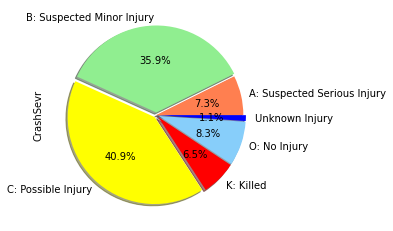

In [63]:
colors = ["coral", "lightgreen", "yellow", "red", "lightskyblue", "blue"]
explode = (0, 0.03, 0.03, 0.03, 0.03, 0.03)
count_severity_peds.plot(kind='pie', colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)


In [64]:
count_sevr_pedes = pd.DataFrame(count_severity_peds)
count_sevr_pedes = count_sevr_pedes.rename(columns={'CrashSevr':'CountSevr'})
count_sevr_pedes

,CountSevr
CrashSevr,
A: Suspected Serious Injury,2474
B: Suspected Minor Injury,12100
C: Possible Injury,13802
K: Killed,2188
O: No Injury,2781
Unknown Injury,362


In [65]:
count_sevr_pedes.to_csv("data/count_severity_pedes.csv")

In [66]:
severity_group_bkilled = bicycles_df.loc[(bicycles_df_selcols['CrashSevr'] == 'K: Killed')]
severity_group_bkilled.head()


,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
107,"35.2467159998,-81.4257199999",Yes,46,40-49,.,No,With Traffic,K: Killed,Bike Lane / Paved Shoulder,White,...,None,No Special Feature,Smooth Asphalt,Rural,60 - 75 MPH,No Control Present,Clear,No,75,46
130,"35.9863780002,-82.6899900003",Yes,64,60-69,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Smooth Asphalt,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No,55,64
147,"36.294113,-78.5467199997",Yes,45,40-49,.,No,With Traffic,K: Killed,Travel Lane,Black,...,None,No Special Feature,Smooth Asphalt,Rural,20 - 25 MPH,No Control Present,Rain,No,25,45
214,"35.5845570001,-77.3623000005",Yes,29,25-29,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,Four-Way Intersection,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,45,29
246,"35.8763660002,-78.5756699999",Yes,38,30-39,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,50 - 55 MPH,No Control Present,Cloudy,No,55,38


In [67]:
len(severity_group_bkilled)


259

In [53]:
# C: Possible Injury             13802
# B: Suspected Minor Injury      12100
# O: No Injury                    2781
# A: Suspected Serious Injury     2474
# K: Killed                       2188
# Unknown Injury                   362
# Name: CrashSevr, dtype: int64


In [68]:
severity_group_serinj = bicycles_df.loc[(bicycles_df_selcols['CrashSevr'] == 'A: Suspected Serious Injury')]
severity_group_mininj = bicycles_df.loc[(bicycles_df_selcols['CrashSevr'] == 'B: Suspected Minor Injury')]
severity_group_posinj = bicycles_df.loc[(bicycles_df_selcols['CrashSevr'] == 'C: Possible Injury')]
severity_group_noinj = bicycles_df.loc[(bicycles_df_selcols['CrashSevr'] == 'O: No Injury')]
severity_group_ukn = bicycles_df.loc[(bicycles_df_selcols['CrashSevr'] == 'Unknown Injury')]


In [69]:
bage_0 = severity_group_ukn['Age']
bage_1 = severity_group_noinj['Age']
bage_2 = severity_group_posinj['Age']
bage_3 = severity_group_mininj['Age']
bage_4 = severity_group_serinj['Age']
bage_5 = severity_group_bkilled['Age']


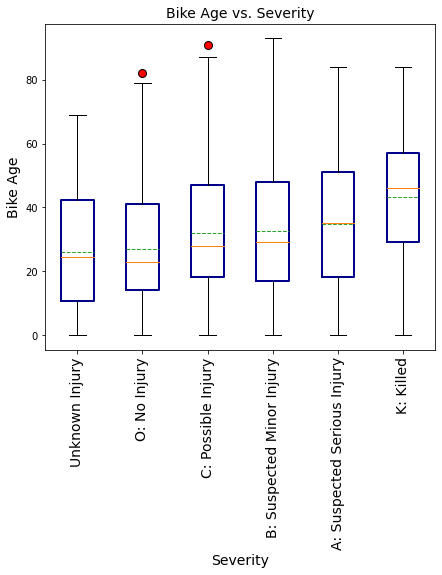

In [70]:
boxprops=dict(linestyle='-', linewidth=2, color='darkblue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none')

severity_groups = ['Unknown Injury', 'O: No Injury', 'C: Possible Injury', 'B: Suspected Minor Injury', 'A: Suspected Serious Injury', 'K: Killed']
data = [bage_0, bage_1, bage_2, bage_3, bage_4, bage_5]
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_xlabel('Severity', fontsize=14)
ax1.set_ylabel('Bike Age', fontsize=14)
ax1.set_title('Bike Age vs. Severity', fontsize=14)

ax1.boxplot(data, boxprops=boxprops, flierprops=flierprops, showmeans=True, meanline=True)

ax1.set_xticklabels(severity_groups, rotation=90, fontsize=14)
plt.show()

In [71]:
pedsev_group_killed = pedestrian_df.loc[(pedestrian_df_selcols['CrashSevr'] == 'K: Killed')]
pedsev_group_serinj = pedestrian_df.loc[(pedestrian_df_selcols['CrashSevr'] == 'A: Suspected Serious Injury')]
pedsev_group_mininj = pedestrian_df.loc[(pedestrian_df_selcols['CrashSevr'] == 'B: Suspected Minor Injury')]
pedsev_group_posinj = pedestrian_df.loc[(pedestrian_df_selcols['CrashSevr'] == 'C: Possible Injury')]
pedsev_group_noinj = pedestrian_df.loc[(pedestrian_df_selcols['CrashSevr'] == 'O: No Injury')]
pedsev_group_ukn = pedestrian_df.loc[(pedestrian_df_selcols['CrashSevr'] == 'Unknown Injury')]

In [72]:
pedage_0 = pedsev_group_ukn['Age']
pedage_1 = pedsev_group_noinj['Age']
pedage_2 = pedsev_group_posinj['Age']
pedage_3 = pedsev_group_mininj['Age']
pedage_4 = pedsev_group_serinj['Age']
pedage_5 = pedsev_group_killed['Age']

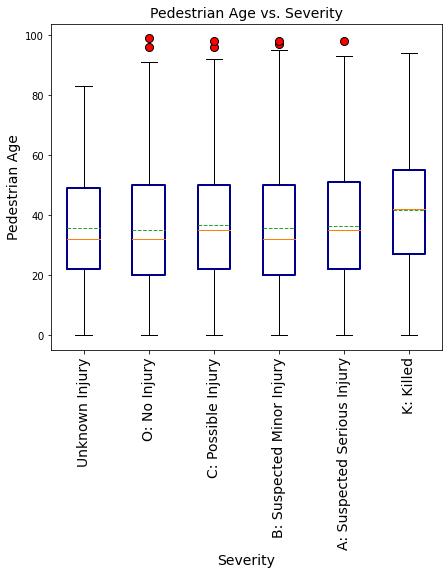

In [73]:
boxprops=dict(linestyle='-', linewidth=2, color='darkblue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none')

severity_groups = ['Unknown Injury', 'O: No Injury', 'C: Possible Injury', 'B: Suspected Minor Injury', 'A: Suspected Serious Injury', 'K: Killed']
data = [pedage_0, pedage_1, pedage_2, pedage_3, pedage_4, pedage_5]
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.set_xlabel('Severity', fontsize=14)
ax1.set_ylabel('Pedestrian Age', fontsize=14)
ax1.set_title('Pedestrian Age vs. Severity', fontsize=14)

ax1.boxplot(data, boxprops=boxprops, flierprops=flierprops, showmeans=True, meanline=True)

ax1.set_xticklabels(severity_groups, rotation=90, fontsize=14)
plt.show()

In [74]:
severity_group_bkilled_age = severity_group_bkilled.groupby(['BikeAgeGrp'])
severity_group_bkilled_age.head(20)


,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
107,"35.2467159998,-81.4257199999",Yes,46,40-49,.,No,With Traffic,K: Killed,Bike Lane / Paved Shoulder,White,...,None,No Special Feature,Smooth Asphalt,Rural,60 - 75 MPH,No Control Present,Clear,No,75,46
130,"35.9863780002,-82.6899900003",Yes,64,60-69,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Smooth Asphalt,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No,55,64
147,"36.294113,-78.5467199997",Yes,45,40-49,.,No,With Traffic,K: Killed,Travel Lane,Black,...,None,No Special Feature,Smooth Asphalt,Rural,20 - 25 MPH,No Control Present,Rain,No,25,45
214,"35.5845570001,-77.3623000005",Yes,29,25-29,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,Four-Way Intersection,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,45,29
246,"35.8763660002,-78.5756699999",Yes,38,30-39,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,50 - 55 MPH,No Control Present,Cloudy,No,55,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,"36.0359736199,-79.8002739402",Yes,71,70+,No,No,Not Applicable,K: Killed,Travel Lane,Black,...,None,No Special Feature,Smooth Asphalt,Urban,5 - 15 MPH,No Control Present,Clear,No,15,71
11051,"34.4407990101,-78.0854534697",Yes,23,20-24,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Rural,50 - 55 MPH,No Control Present,Clear,No,55,23
11091,"35.2960585809,-80.7261517304",Yes,18,16-19,Missing,Missing,Unknown,K: Killed,Travel Lane,Black,...,None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Cloudy,No,45,18
11095,"34.7932237337,-76.8773299597",Yes,20,20-24,No,No,With Traffic,K: Killed,Travel Lane,White,...,None,Four-Way Intersection,Smooth Asphalt,Rural,50 - 55 MPH,Stop Sign,Rain,No,55,20


In [75]:
count_bkilled_age = severity_group_bkilled_age['Age'].count()
count_bkilled_age


BikeAgeGrp
11-15      12
16-19      20
20-24      14
25-29      16
30-39      28
40-49      55
50-59      59
6-10        6
60-69      33
70+        15
Unknown     1
Name: Age, dtype: int64

In [113]:
count_bkilled_agegroup = pd.DataFrame(count_bkilled_age)
count_bkilled_agegroup = count_bkilled_agegroup.rename(columns={'Age':'CountAge'})
count_bkilled_agegroup

,CountAge
BikeAgeGrp,
11-15,12
16-19,20
20-24,14
25-29,16
30-39,28
40-49,55
50-59,59
6-10,6
60-69,33


In [105]:
count_bkilled_agegroup.to_csv("data/count_bkilled_agegroup.csv")

In [79]:
bkilled_age_group = count_bkilled_age.keys()
bkilled_age_group


Index(['11-15', '16-19', '20-24', '25-29', '30-39', '40-49', '50-59', '6-10',
       '60-69', '70+', 'Unknown'],
      dtype='object', name='BikeAgeGrp')

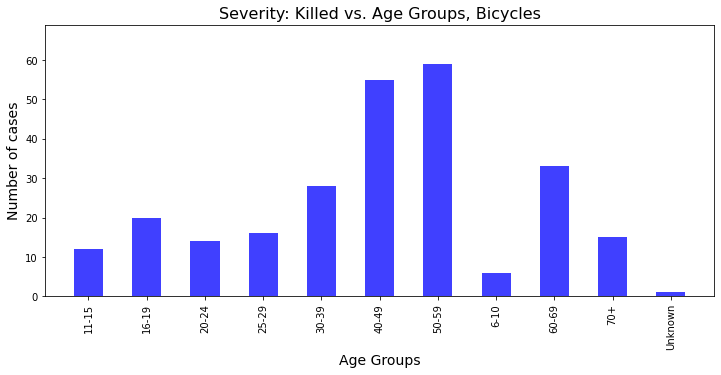

In [80]:
x_axis = np.arange(len(bkilled_age_group))
plt.figure(figsize=(12,5))

plt.xlim(-0.75, len(bkilled_age_group)-0.25)
plt.ylim(0, max(count_bkilled_age)+10)

count_severety5_age_bp = plt.bar(bkilled_age_group, count_bkilled_age, width=0.5, facecolor='b', alpha=0.75, align='center')

plt.title("Severity: Killed vs. Age Groups, Bicycles", fontsize=16)
plt.xlabel("Age Groups", fontsize=14)
plt.ylabel("Number of cases", fontsize=14)

plt.xticks(bkilled_age_group, rotation='vertical')
plt.show()

In [81]:
severity_group_bkilled_sl = severity_group_bkilled.groupby(['SpeedLimit_upper_value'])
severity_group_bkilled_sl.head(20)


,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
107,"35.2467159998,-81.4257199999",Yes,46,40-49,.,No,With Traffic,K: Killed,Bike Lane / Paved Shoulder,White,...,None,No Special Feature,Smooth Asphalt,Rural,60 - 75 MPH,No Control Present,Clear,No,75,46
130,"35.9863780002,-82.6899900003",Yes,64,60-69,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Smooth Asphalt,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No,55,64
147,"36.294113,-78.5467199997",Yes,45,40-49,.,No,With Traffic,K: Killed,Travel Lane,Black,...,None,No Special Feature,Smooth Asphalt,Rural,20 - 25 MPH,No Control Present,Rain,No,25,45
214,"35.5845570001,-77.3623000005",Yes,29,25-29,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,Four-Way Intersection,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,45,29
246,"35.8763660002,-78.5756699999",Yes,38,30-39,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,50 - 55 MPH,No Control Present,Cloudy,No,55,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9598,"35.9254826898,-79.0538750904",Yes,57,50-59,No,No,Facing Traffic,K: Killed,Travel Lane,White,...,None,"Driveway, Private",Smooth Asphalt,Urban,Unknown,No Control Present,Clear,No,0,57
9908,"35.9581566201,-77.7841196799",Yes,45,40-49,Unknown,Unknown,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,60 - 75 MPH,No Control Present,Cloudy,No,75,45
10992,"36.0359736199,-79.8002739402",Yes,71,70+,No,No,Not Applicable,K: Killed,Travel Lane,Black,...,None,No Special Feature,Smooth Asphalt,Urban,5 - 15 MPH,No Control Present,Clear,No,15,71
11190,"34.8811399996,-77.9744399999",Yes,37,30-39,.,No,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,...,None,No Special Feature,Coarse Asphalt,Rural,Unknown,No Control Present,Clear,No,0,37


In [82]:
count_bkilled_sl = severity_group_bkilled_sl['SpeedLimit_upper_value'].count()
count_bkilled_sl


SpeedLimit_upper_value
0       3
15      1
25      8
35     48
45     80
55    113
75      6
Name: SpeedLimit_upper_value, dtype: int64

In [83]:
count_bkilled_speedlimit = pd.DataFrame(count_bkilled_sl)
count_bkilled_speedlimit = count_bkilled_speedlimit.rename(columns={'SpeedLimit_upper_value':'CountSpeedLimit'})
count_bkilled_speedlimit

,CountSpeedLimit
SpeedLimit_upper_value,
0,3
15,1
25,8
35,48
45,80
55,113
75,6


In [84]:
count_bkilled_speedlimit.to_csv("data/count_bkilled_speedlimit.csv")

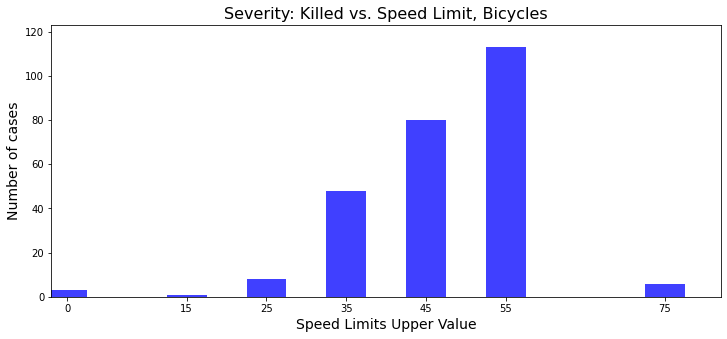

In [85]:
bkilled_sl_group = count_bkilled_sl.keys()
x_axis = np.arange(len(bkilled_sl_group))
plt.figure(figsize=(12,5))

plt.xlim(-2, len(bkilled_sl_group) + 75)
plt.ylim(0, max(count_bkilled_sl)+10)

count_severety5_age_bp = plt.bar(bkilled_sl_group, count_bkilled_sl, width=5, facecolor='b', alpha=0.75, align='center')

plt.title("Severity: Killed vs. Speed Limit, Bicycles", fontsize=16)
plt.xlabel("Speed Limits Upper Value", fontsize=14)
plt.ylabel("Number of cases", fontsize=14)

plt.xticks(bkilled_sl_group)
plt.show()

In [86]:
severity_group_bkilled_sex = severity_group_bkilled.groupby(['BikeSex'])
count_bkilled_fm = severity_group_bkilled_sex['BikeSex'].count()
count_bkilled_fm


BikeSex
Female     30
Male      229
Name: BikeSex, dtype: int64

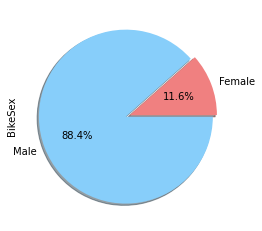

In [87]:
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)
count_bkilled_fm.plot(kind='pie', colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)


In [88]:
count_bkilled_sex = pd.DataFrame(count_bkilled_fm)
count_bkilled_sex = count_bkilled_sex.rename(columns={'BikeSex':'CountBikeSex'})
count_bkilled_sex

,CountBikeSex
BikeSex,
Female,30
Male,229


In [89]:
count_bkilled_sex.to_csv("data/count_bkilled_sex.csv")

In [98]:
severity_group_bkilled_county = severity_group_bkilled.groupby(['County'])
severity_group_bkilled_county.head(20)

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
107,"35.2467159998,-81.4257199999",Yes,46,40-49,.,No,With Traffic,K: Killed,Bike Lane / Paved Shoulder,White,...,None,No Special Feature,Smooth Asphalt,Rural,60 - 75 MPH,No Control Present,Clear,No,75,46
130,"35.9863780002,-82.6899900003",Yes,64,60-69,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Smooth Asphalt,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No,55,64
147,"36.294113,-78.5467199997",Yes,45,40-49,.,No,With Traffic,K: Killed,Travel Lane,Black,...,None,No Special Feature,Smooth Asphalt,Rural,20 - 25 MPH,No Control Present,Rain,No,25,45
214,"35.5845570001,-77.3623000005",Yes,29,25-29,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,Four-Way Intersection,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,45,29
246,"35.8763660002,-78.5756699999",Yes,38,30-39,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,50 - 55 MPH,No Control Present,Cloudy,No,55,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11149,"35.2810199998,-81.5497739998",Yes,46,40-49,.,Yes,Facing Traffic,K: Killed,Travel Lane,White,...,None,Four-Way Intersection,Smooth Asphalt,Urban,40 - 45 MPH,Stop And Go Signal,Clear,No,45,46
11169,"36.1046329996,-78.9919299997",Yes,59,50-59,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Smooth Asphalt,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No,55,59
11190,"34.8811399996,-77.9744399999",Yes,37,30-39,.,No,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,...,None,No Special Feature,Coarse Asphalt,Rural,Unknown,No Control Present,Clear,No,0,37
11219,"36.0501139999,-80.1310100005",Yes,14,11-15,.,No,With Traffic,K: Killed,Travel Lane,White,...,None,No Special Feature,Smooth Asphalt,Urban,60 - 75 MPH,No Control Present,Clear,No,75,14


In [99]:
count_bkilled_county = severity_group_bkilled_county['County'].count()
count_bkilled_county

County
Alamance       3
Avery          2
Bertie         3
Brunswick      7
Buncombe       3
              ..
Wake          18
Washington     2
Wayne          2
Wilkes         1
Wilson         1
Name: County, Length: 71, dtype: int64

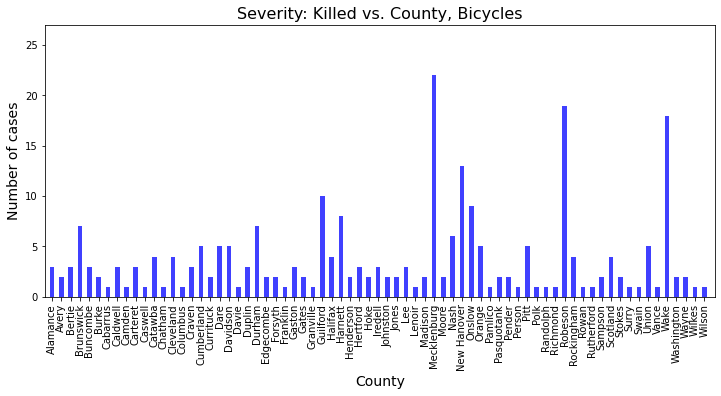

In [100]:
bkilled_county_group = count_bkilled_county.keys()
x_axis = np.arange(len(bkilled_county_group))
plt.figure(figsize=(12,5))

plt.xlim(-0.75, len(bkilled_county_group) + 0.1)
plt.ylim(0, max(count_bkilled_county)+ 5)

count_severety5_age_bp = plt.bar(bkilled_county_group, count_bkilled_county, width=0.5, facecolor='b', alpha=0.75, align='center')

plt.title("Severity: Killed vs. County, Bicycles", fontsize=16)
plt.xlabel("County", fontsize=14)
plt.ylabel("Number of cases", fontsize=14)

plt.xticks(bkilled_county_group, rotation='vertical')
plt.show()

In [124]:
count_bkilled_counties = pd.DataFrame(count_bkilled_county)
count_bkilled_counties = count_bkilled_counties.rename(columns={'County':'CountCounty'})
#count_bkilled_counties = count_bkilled_counties['CountCounty'].sort_values(ascending=False)
count_bkilled_counties

,CountCounty
County,
Alamance,3
Avery,2
Bertie,3
Brunswick,7
Buncombe,3
...,...
Wake,18
Washington,2
Wayne,2


In [125]:
count_bkilled_counties.to_csv("data/count_bkilled_counties.csv")

In [72]:
severity_group_pedkilled_age = pedsev_group_killed.groupby(['PedAgeGrp'])
severity_group_pedkilled_age.head(20)

,geo_point_2d,Ambulance,City,County,Alcohol Present,Day of Week,CrashGrp,CrashHour,CrashLoc,CrashMonth,...,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
0,"35.5030005611,-83.0770548701",Yes,None - Rural Crash,Haywood,No,Wednesday,Unusual Circumstances,22,Non-Roadway,October,...,"Driveway, Private",Gravel,Mountains,Rural,Unknown,No Control Present,Clear,No,0,36
6,"35.1091595442,-77.0566501597",Yes,New Bern,Craven,No,Thursday,Crossing Roadway—Vehicle Not Turning,20,Non-Intersection,October,...,No Special Feature,Smooth Asphalt,Coastal,Urban,30 - 35 MPH,No Control Present,Clear,No,35,59
74,"35.6536136993,-80.5110295305",No,Salisbury,Rowan,Yes,Tuesday,Walking Along Roadway,22,Non-Intersection,March,...,No Special Feature,Smooth Asphalt,Piedmont,Urban,40 - 45 MPH,"Double Yellow Line, No Passing Zone",Clear,No,45,31
92,"35.5322933194,-78.3084641203",Yes,Selma,Johnston,No,Saturday,Unusual Circumstances,14,Non-Intersection,June,...,On or Off Ramp,Coarse Asphalt,Coastal,Urban,50 - 55 MPH,No Control Present,Clear,No,55,23
121,"35.747249338,-81.6016830599",Yes,None - Rural Crash,Burke,No,Monday,Working or Playing in Roadway,0,Non-Intersection,October,...,No Special Feature,Coarse Asphalt,Mountains,Rural,40 - 45 MPH,"Double Yellow Line, No Passing Zone",Rain,No,45,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21284,"35.2872399998,-81.5615000005",Yes,Shelby,Cleveland,Yes,Friday,Crossing Roadway—Vehicle Not Turning,21,Non-Intersection,October,...,No Special Feature,Smooth Asphalt,Mountains,Urban,50 - 55 MPH,No Control Present,Clear,No,55,66
21502,"35.6069703522,-82.3536425496",Yes,Black Mountain,Buncombe,No,Friday,Dash/Dart-Out,19,Non-Intersection,December,...,No Special Feature,Smooth Asphalt,Mountains,Urban,40 - 45 MPH,No Control Present,Clear,No,45,6
21835,"35.9002399997,-81.5494000005",Yes,Lenoir,Caldwell,Yes,Tuesday,Crossing Roadway—Vehicle Not Turning,21,Non-Intersection,October,...,No Special Feature,Coarse Asphalt,Mountains,Urban,40 - 45 MPH,No Control Present,Cloudy,No,45,62
33164,"35.5481613657,-78.2935554098",No,Selma,Johnston,Yes,Saturday,Walking Along Roadway,21,Non-Intersection,August,...,No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,No Control Present,Cloudy,No,35,0


In [73]:
count_pedkilled_age = severity_group_pedkilled_age['Age'].count()
count_pedkilled_age

PedAgeGrp
0-5         63
11-15       58
16-19       73
16-20       33
20-24      162
21-25       43
25-29      157
26-30       45
30-39      259
31-40       82
40-49      273
41-50      101
50-59      328
51-60       79
6-10        29
60-69      177
61-79       26
70+        147
71+         47
Unknown      6
Name: Age, dtype: int64

In [74]:
pedkilled_age_group = count_pedkilled_age.keys()
pedkilled_age_group

Index(['0-5', '11-15', '16-19', '16-20', '20-24', '21-25', '25-29', '26-30',
       '30-39', '31-40', '40-49', '41-50', '50-59', '51-60', '6-10', '60-69',
       '61-79', '70+', '71+', 'Unknown'],
      dtype='object', name='PedAgeGrp')

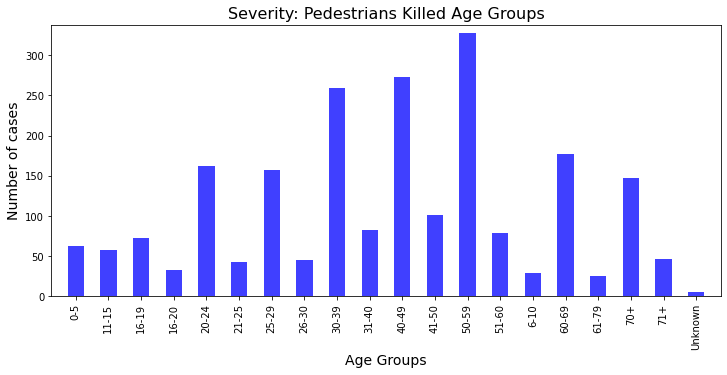

In [75]:
x_axis = np.arange(len(pedkilled_age_group))
plt.figure(figsize=(12,5))

plt.xlim(-0.75, len(pedkilled_age_group)-0.25)
plt.ylim(0, max(count_pedkilled_age)+10)

count_severety5_age_bp = plt.bar(pedkilled_age_group, count_pedkilled_age, width=0.5, facecolor='b', alpha=0.75, align='center')

plt.title("Severity: Pedestrians Killed Age Groups", fontsize=16)
plt.xlabel("Age Groups", fontsize=14)
plt.ylabel("Number of cases", fontsize=14)

plt.xticks(pedkilled_age_group, rotation='vertical')
plt.show()

In [76]:
severity_group_pedkilled_sl = pedsev_group_killed.groupby(['SpeedLimit_upper_value'])
severity_group_pedkilled_sl.head(20)

,geo_point_2d,Ambulance,City,County,Alcohol Present,Day of Week,CrashGrp,CrashHour,CrashLoc,CrashMonth,...,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,SpeedLimit_upper_value,Age
0,"35.5030005611,-83.0770548701",Yes,None - Rural Crash,Haywood,No,Wednesday,Unusual Circumstances,22,Non-Roadway,October,...,"Driveway, Private",Gravel,Mountains,Rural,Unknown,No Control Present,Clear,No,0,36
6,"35.1091595442,-77.0566501597",Yes,New Bern,Craven,No,Thursday,Crossing Roadway—Vehicle Not Turning,20,Non-Intersection,October,...,No Special Feature,Smooth Asphalt,Coastal,Urban,30 - 35 MPH,No Control Present,Clear,No,35,59
74,"35.6536136993,-80.5110295305",No,Salisbury,Rowan,Yes,Tuesday,Walking Along Roadway,22,Non-Intersection,March,...,No Special Feature,Smooth Asphalt,Piedmont,Urban,40 - 45 MPH,"Double Yellow Line, No Passing Zone",Clear,No,45,31
92,"35.5322933194,-78.3084641203",Yes,Selma,Johnston,No,Saturday,Unusual Circumstances,14,Non-Intersection,June,...,On or Off Ramp,Coarse Asphalt,Coastal,Urban,50 - 55 MPH,No Control Present,Clear,No,55,23
121,"35.747249338,-81.6016830599",Yes,None - Rural Crash,Burke,No,Monday,Working or Playing in Roadway,0,Non-Intersection,October,...,No Special Feature,Coarse Asphalt,Mountains,Rural,40 - 45 MPH,"Double Yellow Line, No Passing Zone",Rain,No,45,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17422,"35.9773860004,-78.8969689997",Yes,Durham,Durham,No,Sunday,Unusual Circumstances,18,Intersection,August,...,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Clear,No,25,7
17508,"36.052149819,-79.80513898",Yes,Greensboro,Guilford,No,Friday,Crossing Roadway—Vehicle Not Turning,21,Intersection,June,...,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Cloudy,No,25,33
17800,"35.31486,-82.4623000003",Yes,Hendersonville,Henderson,No,Saturday,Crossing Roadway—Vehicle Turning,11,Non-Intersection,June,...,No Special Feature,Coarse Asphalt,Mountains,Urban,20 - 25 MPH,No Control Present,Clear,No,25,67
18611,"35.3192239528,-80.9518355498",Yes,Charlotte,Mecklenburg,No,Monday,Off Roadway,12,Non-Roadway,December,...,"Driveway, Public",Coarse Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,25,90


In [77]:
count_pedkilled_sl = severity_group_pedkilled_sl['SpeedLimit_upper_value'].count()
count_pedkilled_sl

SpeedLimit_upper_value
0      70
15     61
25     50
35    419
45    668
55    676
75    244
Name: SpeedLimit_upper_value, dtype: int64

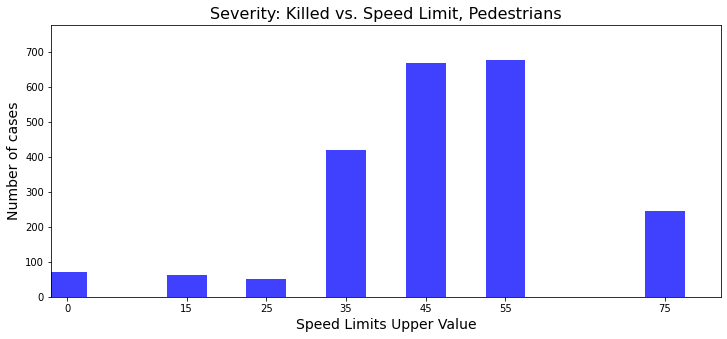

In [78]:
pedkilled_sl_group = count_pedkilled_sl.keys()
x_axis = np.arange(len(pedkilled_sl_group))
plt.figure(figsize=(12,5))

plt.xlim(-2, len(pedkilled_sl_group) + 75)
plt.ylim(0, max(count_pedkilled_sl)+100)

plt.bar(pedkilled_sl_group, count_pedkilled_sl, width=5, facecolor='b', alpha=0.75, align='center')

plt.title("Severity: Killed vs. Speed Limit, Pedestrians", fontsize=16)
plt.xlabel("Speed Limits Upper Value", fontsize=14)
plt.ylabel("Number of cases", fontsize=14)

plt.xticks(pedkilled_sl_group)
plt.show()

In [79]:
severity_group_pedkilled_sex = pedsev_group_killed.groupby(['PedSex'])
count_pedkilled_fm = severity_group_pedkilled_sex['PedSex'].count()
count_pedkilled_fm

PedSex
Female      614
Male       1564
Unknown      10
Name: PedSex, dtype: int64

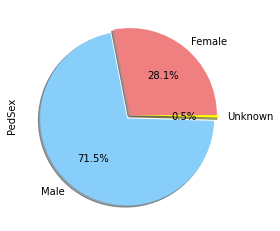

In [80]:
colors = ["lightcoral", "lightskyblue", "yellow"]
explode = (0, 0.05, 0.02)
count_pedkilled_fm.plot(kind='pie', colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)

In [81]:
x_values =  pedsev_group_killed['Age']
y_values =  pedsev_group_killed['SpeedLimit_upper_value']


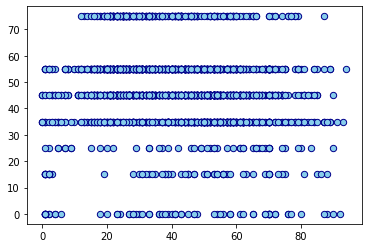

In [82]:
plt.scatter(x_values, y_values, s=40, facecolor="skyblue", color='darkblue')  

